In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\datasets\Sample - Superstore.csv", encoding='latin1')

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

1) Does more discount lead to more profit?

2) Which category of product had the highest and lowest sales by capital?

3) which product category has the highest volume of sales and which ones has the lowest volume?

4) Average delivery time for each ship mode. 

In [15]:
print(df.tail(10))

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9984    9985  CA-2015-100251   5/17/2015   5/23/2015  Standard Class   
9985    9986  CA-2015-100251   5/17/2015   5/23/2015  Standard Class   
9986    9987  CA-2016-125794   9/29/2016   10/3/2016  Standard Class   
9987    9988  CA-2017-163629  11/17/2017  11/21/2017  Standard Class   
9988    9989  CA-2017-163629  11/17/2017  11/21/2017  Standard Class   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country         City  \
9984    DV-13465  Dianna Vittorini   Consumer  United States   Long Beach   
9985    DV-13465  Dianna Vittorini   Consumer  United

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

avg_delivery = df.groupby('Ship Mode')['Delivery Time'].mean().sort_values()

print("Average Delivery Time (Days):")
print(avg_delivery)

Average Delivery Time (Days):
Ship Mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64


          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


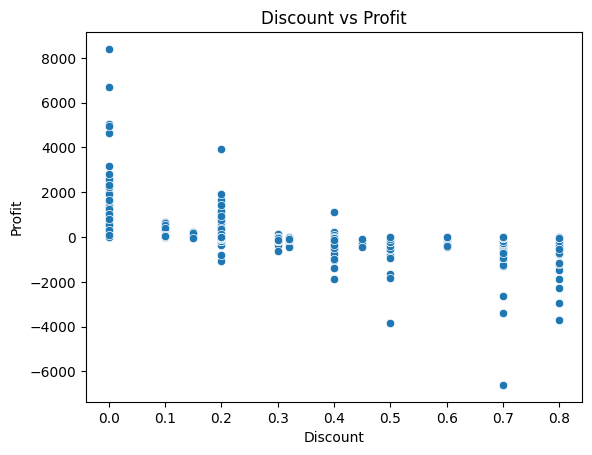

In [19]:
print(df[['Discount', 'Profit']].corr())

sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

Higher the discount lower the profit. Would be better to only offer discounts on products that are not selling to avoid higher inventory costs and avoid discounts on products already selling well.

In [21]:
category_volume = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

print("Volume (Quantity) by Category:")
print(category_volume)

Volume (Quantity) by Category:
Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


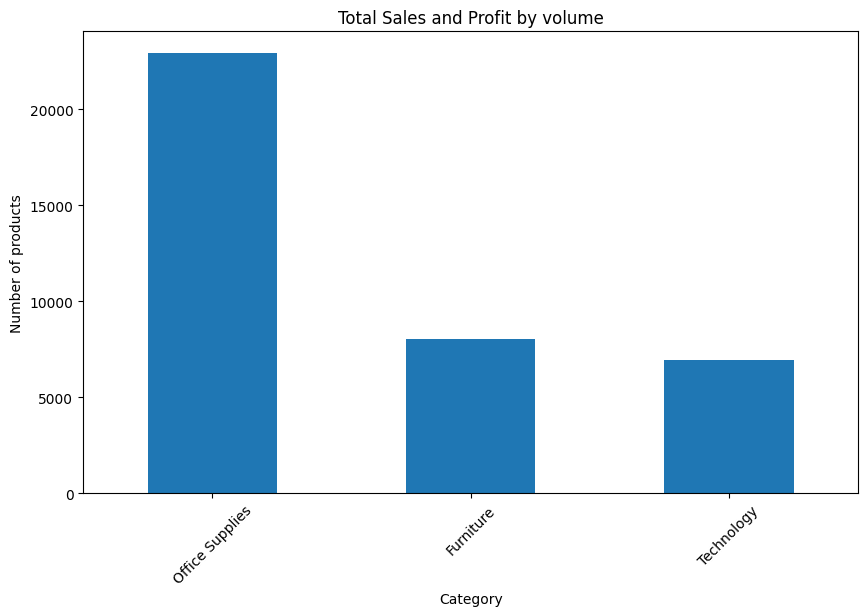

In [25]:
category_volume.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales and Profit by volume')
plt.ylabel('Number of products')
plt.xticks(rotation=45)
plt.show()

In [22]:
category_finance = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print("Financial Performance by Category:")
print(category_finance)

Financial Performance by Category:
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


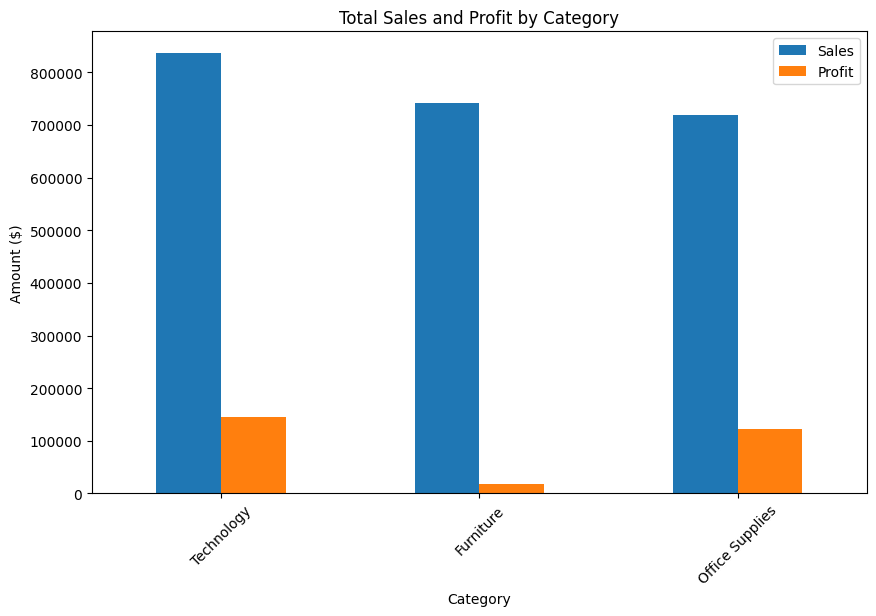

In [23]:
# Quick visualization to compare Sales and Profit
category_finance.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.show()